In [3]:
%matplotlib inline 
from matplotlib import style 
style.use('fivethirtyeight')
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import datetime as dt
 # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
engine = create_engine('sqlite:///Resources/hawaii.sqlite')

In [5]:
 # reflect an existing database into a new model
Base = automap_base()
# reflect the tables 
Base.prepare(engine, reflect=True)

In [6]:
# We can view all of the classes that automap found
# Base.classes.keys()
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement 
Station = Base.classes.station

In [8]:
 # Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# We can view all of the classes that automap found
# Base.classes.keys()
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [10]:
measure_columns = inspector.get_columns('measurement')
for c in measure_columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
station_columns = inspector.get_columns('station')
for c in station_columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# figuring out what was the latest date in the Measurements data
(session.query(Measurement.date, Measurement.prcp)
         .order_by(Measurement.date.desc())
         .limit(10).all())

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None)]

In [13]:
# finding the most recent 12 months of precipitation info

latest_prcp_data = (session.query(Measurement.date, Measurement.prcp)
         .filter(Measurement.date <= '2017-08-23', Measurement.date >= '2016-08-23')
         .order_by(Measurement.date.asc())
         .all())
latest_prcp_data_df = pd.DataFrame(latest_prcp_data, 
                                   columns=['date', 'precipitation']).set_index('date')
latest_prcp_data_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


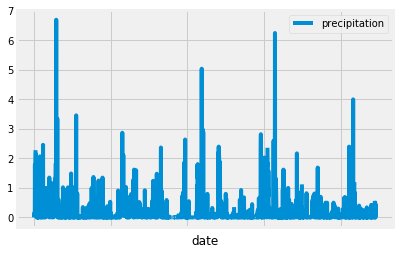

In [14]:
# ploting the latest 12 months of pscp data
latest_prcp_data_df.plot()
plt.show()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [16]:
# names and number of unique stations 
station_list = (session.query(Station.station, Station.name)
                         .distinct()
                         .all())
print(station_list)
number_of_stations = len(station_list)
print(number_of_stations)

[('USC00519397', 'WAIKIKI 717.2, HI US'), ('USC00513117', 'KANEOHE 838.1, HI US'), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'), ('USC00517948', 'PEARL CITY, HI US'), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US'), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US'), ('USC00519281', 'WAIHEE 837.5, HI US'), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US'), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US')]
9


In [34]:
# count of observations in each distinct station 
station_observ_count = (session.query(Measurement.station,
         func.count(Measurement.tobs))
         .group_by(Measurement.station)
         .order_by(func.count(Measurement.tobs).desc())
         .all())
(list(station_observ_count))

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [35]:
# find a way to show the station with the most observations
# count of observations in each distinct station 
# station_observ_count = (session.query(Measurement.station,
#          func.count(Measurement.tobs) as tobs_count))
#          .group_by(Measurement.station)
#          .filter_by(func.max(tobs_count)
#          .all())
# station_observ_count_max

In [37]:
# finding the most recent 12 months of tempature info
latest_temp_data = (session.query(Measurement.date, Measurement.tobs)
         .filter(Measurement.date <= '2017-08-23', Measurement.date >= '2016-08-23')
         .filter(Measurement.station == 'USC00519281')
         .order_by(Measurement.date.asc())
         .all())
latest_temp_data_df = pd.DataFrame(latest_temp_data, 
                                   columns=['date', 'temperature']).set_index('date')
latest_temp_data_df.head()

,temperature
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0


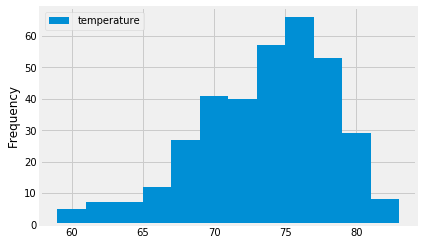

In [44]:
# ploting the latest 12 months of temp data in histagram
latest_temp_data_df.plot.hist(bins=12)
